In [13]:
import pandas as pd

NUM_CLASSES = 10
EPOCHS = 2600
BATCH_SIZE = 400

df = pd.read_csv("./Dataset.csv")
df.drop(["free sulfur dioxide", "total sulfur dioxide"], axis=1, inplace=True)

NUM_FEATURES = df.values.shape[1]-1

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide (norm),total sulfur dioxide (norm),pH,sulphates,alcohol,quality
0,7.2,0.34,0.32,2.5,0.09,3.00,1.81,3.32,0.79,11.1,5.0
1,8.2,0.34,0.37,1.9,0.06,3.00,0.95,3.23,0.81,12.0,6.0
2,7.5,0.59,0.22,1.8,0.08,3.00,0.64,3.10,0.42,9.2,5.0
3,7.9,0.52,0.26,1.9,0.08,2.89,2.41,3.23,0.54,9.5,5.0
4,10.0,0.26,0.54,1.9,0.08,2.89,0.95,2.98,0.63,11.8,8.0


In [16]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(df.values[:, :-1], df.values[:, -1], \
                                                      random_state=13, stratify=df.values[:, -1])
print(x_train.shape, x_valid.shape, y_train.shape, y_valid.shape)

((1017, 10), (339, 10), (1017,), (339,))


In [17]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

# encode class values as integers
encoder = LabelEncoder()
classes = [3.,4.,5.,6.,7.,8.]
encoder.fit(range(NUM_CLASSES))

def encode_label(labels):
    encoded_labels = encoder.transform(labels)
    
    # convert integers to vector variables (i.e. one hot encoded)
    return np_utils.to_categorical(encoded_labels, num_classes=NUM_CLASSES)

Using TensorFlow backend.


In [36]:
%%time

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(int(round(NUM_FEATURES/2)), activation='tanh', input_dim=NUM_FEATURES))
model.add(Dense(int(round(NUM_FEATURES/2)), activation='tanh'))
model.add(Dense(6, activation='tanh'))
model.add(Dense(NUM_CLASSES, activation='softmax'))

sgd = SGD(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

history = model.fit(x_train, encode_label(y_train), epochs=EPOCHS, batch_size=BATCH_SIZE, \
    validation_data=(x_valid, encode_label(y_valid)))

Train on 1017 samples, validate on 339 samples
Epoch 1/5000
1017/1017 [==============================] - 0s - loss: 2.2711 - acc: 0.3382 - val_loss: 2.2599 - val_acc: 0.4130
Epoch 2/5000
1017/1017 [==============================] - 0s - loss: 2.2589 - acc: 0.4002 - val_loss: 2.2481 - val_acc: 0.4277
Epoch 3/5000
1017/1017 [==============================] - 0s - loss: 2.2471 - acc: 0.4130 - val_loss: 2.2364 - val_acc: 0.4248
Epoch 4/5000
1017/1017 [==============================] - 0s - loss: 2.2355 - acc: 0.4228 - val_loss: 2.2249 - val_acc: 0.4218
Epoch 5/5000
1017/1017 [==============================] - 0s - loss: 2.2240 - acc: 0.4228 - val_loss: 2.2136 - val_acc: 0.4248
Epoch 6/5000
1017/1017 [==============================] - 0s - loss: 2.2127 - acc: 0.4218 - val_loss: 2.2024 - val_acc: 0.4218
Epoch 7/5000
1017/1017 [==============================] - 0s - loss: 2.2016 - acc: 0.4238 - val_loss: 2.1913 - val_acc: 0.4218
Epoch 8/5000
1017/1017 [==============================] - 0s - l

1017/1017 [==============================] - 0s - loss: 1.3414 - acc: 0.4248 - val_loss: 1.3319 - val_acc: 0.4248
Epoch 128/5000
1017/1017 [==============================] - 0s - loss: 1.3397 - acc: 0.4248 - val_loss: 1.3302 - val_acc: 0.4248
Epoch 129/5000
1017/1017 [==============================] - 0s - loss: 1.3379 - acc: 0.4248 - val_loss: 1.3285 - val_acc: 0.4248
Epoch 130/5000
1017/1017 [==============================] - 0s - loss: 1.3363 - acc: 0.4248 - val_loss: 1.3269 - val_acc: 0.4248
Epoch 131/5000
1017/1017 [==============================] - 0s - loss: 1.3346 - acc: 0.4248 - val_loss: 1.3252 - val_acc: 0.4248
Epoch 132/5000
1017/1017 [==============================] - 0s - loss: 1.3329 - acc: 0.4248 - val_loss: 1.3236 - val_acc: 0.4248
Epoch 133/5000
1017/1017 [==============================] - 0s - loss: 1.3313 - acc: 0.4248 - val_loss: 1.3220 - val_acc: 0.4248
Epoch 134/5000
1017/1017 [==============================] - ETA: 0s - loss: 1.2905 - acc: 0.435 - 0s - loss: 1.3

1017/1017 [==============================] - 0s - loss: 1.2430 - acc: 0.4248 - val_loss: 1.2367 - val_acc: 0.4248
Epoch 254/5000
1017/1017 [==============================] - 0s - loss: 1.2427 - acc: 0.4248 - val_loss: 1.2365 - val_acc: 0.4248
Epoch 255/5000
1017/1017 [==============================] - 0s - loss: 1.2425 - acc: 0.4248 - val_loss: 1.2363 - val_acc: 0.4248
Epoch 256/5000
1017/1017 [==============================] - 0s - loss: 1.2423 - acc: 0.4248 - val_loss: 1.2362 - val_acc: 0.4248
Epoch 257/5000
1017/1017 [==============================] - 0s - loss: 1.2422 - acc: 0.4248 - val_loss: 1.2360 - val_acc: 0.4248
Epoch 258/5000
1017/1017 [==============================] - 0s - loss: 1.2418 - acc: 0.4248 - val_loss: 1.2358 - val_acc: 0.4248
Epoch 259/5000
1017/1017 [==============================] - 0s - loss: 1.2418 - acc: 0.4248 - val_loss: 1.2356 - val_acc: 0.4248
Epoch 260/5000
1017/1017 [==============================] - 0s - loss: 1.2415 - acc: 0.4248 - val_loss: 1.2354 -

1017/1017 [==============================] - 0s - loss: 1.2329 - acc: 0.4248 - val_loss: 1.2278 - val_acc: 0.4248
Epoch 317/5000
1017/1017 [==============================] - 0s - loss: 1.2328 - acc: 0.4248 - val_loss: 1.2278 - val_acc: 0.4248
Epoch 318/5000
1017/1017 [==============================] - 0s - loss: 1.2327 - acc: 0.4248 - val_loss: 1.2277 - val_acc: 0.4248
Epoch 319/5000
1017/1017 [==============================] - 0s - loss: 1.2326 - acc: 0.4248 - val_loss: 1.2276 - val_acc: 0.4248
Epoch 320/5000
1017/1017 [==============================] - 0s - loss: 1.2325 - acc: 0.4248 - val_loss: 1.2274 - val_acc: 0.4248
Epoch 321/5000
1017/1017 [==============================] - 0s - loss: 1.2323 - acc: 0.4248 - val_loss: 1.2273 - val_acc: 0.4248
Epoch 322/5000
1017/1017 [==============================] - 0s - loss: 1.2322 - acc: 0.4248 - val_loss: 1.2272 - val_acc: 0.4248
Epoch 323/5000
1017/1017 [==============================] - 0s - loss: 1.2321 - acc: 0.4248 - val_loss: 1.2271 -

1017/1017 [==============================] - 0s - loss: 1.2227 - acc: 0.4248 - val_loss: 1.2190 - val_acc: 0.4248
Epoch 443/5000
1017/1017 [==============================] - 0s - loss: 1.2226 - acc: 0.4248 - val_loss: 1.2190 - val_acc: 0.4248
Epoch 444/5000
1017/1017 [==============================] - 0s - loss: 1.2226 - acc: 0.4248 - val_loss: 1.2189 - val_acc: 0.4248
Epoch 445/5000
1017/1017 [==============================] - 0s - loss: 1.2225 - acc: 0.4248 - val_loss: 1.2189 - val_acc: 0.4248
Epoch 446/5000
1017/1017 [==============================] - 0s - loss: 1.2224 - acc: 0.4248 - val_loss: 1.2189 - val_acc: 0.4248
Epoch 447/5000
1017/1017 [==============================] - 0s - loss: 1.2223 - acc: 0.4248 - val_loss: 1.2188 - val_acc: 0.4248
Epoch 448/5000
1017/1017 [==============================] - 0s - loss: 1.2223 - acc: 0.4248 - val_loss: 1.2188 - val_acc: 0.4248
Epoch 449/5000
1017/1017 [==============================] - 0s - loss: 1.2223 - acc: 0.4248 - val_loss: 1.2187 -

1017/1017 [==============================] - 0s - loss: 1.2170 - acc: 0.4248 - val_loss: 1.2143 - val_acc: 0.4248
Epoch 569/5000
1017/1017 [==============================] - 0s - loss: 1.2170 - acc: 0.4248 - val_loss: 1.2143 - val_acc: 0.4248
Epoch 570/5000
1017/1017 [==============================] - 0s - loss: 1.2170 - acc: 0.4248 - val_loss: 1.2143 - val_acc: 0.4248
Epoch 571/5000
1017/1017 [==============================] - 0s - loss: 1.2170 - acc: 0.4248 - val_loss: 1.2142 - val_acc: 0.4248
Epoch 572/5000
1017/1017 [==============================] - 0s - loss: 1.2168 - acc: 0.4248 - val_loss: 1.2142 - val_acc: 0.4248
Epoch 573/5000
1017/1017 [==============================] - 0s - loss: 1.2169 - acc: 0.4248 - val_loss: 1.2142 - val_acc: 0.4248
Epoch 574/5000
1017/1017 [==============================] - 0s - loss: 1.2169 - acc: 0.4248 - val_loss: 1.2142 - val_acc: 0.4248
Epoch 575/5000
1017/1017 [==============================] - 0s - loss: 1.2168 - acc: 0.4248 - val_loss: 1.2141 -

1017/1017 [==============================] - 0s - loss: 1.2133 - acc: 0.4248 - val_loss: 1.2111 - val_acc: 0.4248
Epoch 695/5000
1017/1017 [==============================] - 0s - loss: 1.2132 - acc: 0.4248 - val_loss: 1.2111 - val_acc: 0.4248
Epoch 696/5000
1017/1017 [==============================] - 0s - loss: 1.2132 - acc: 0.4248 - val_loss: 1.2111 - val_acc: 0.4248
Epoch 697/5000
1017/1017 [==============================] - 0s - loss: 1.2132 - acc: 0.4248 - val_loss: 1.2111 - val_acc: 0.4248
Epoch 698/5000
1017/1017 [==============================] - 0s - loss: 1.2132 - acc: 0.4248 - val_loss: 1.2111 - val_acc: 0.4248
Epoch 699/5000
1017/1017 [==============================] - 0s - loss: 1.2132 - acc: 0.4248 - val_loss: 1.2110 - val_acc: 0.4248
Epoch 700/5000
1017/1017 [==============================] - 0s - loss: 1.2131 - acc: 0.4248 - val_loss: 1.2110 - val_acc: 0.4248
Epoch 701/5000
1017/1017 [==============================] - 0s - loss: 1.2131 - acc: 0.4248 - val_loss: 1.2110 -

1017/1017 [==============================] - 0s - loss: 1.2107 - acc: 0.4248 - val_loss: 1.2088 - val_acc: 0.4248
Epoch 821/5000
1017/1017 [==============================] - 0s - loss: 1.2106 - acc: 0.4248 - val_loss: 1.2088 - val_acc: 0.4248
Epoch 822/5000
1017/1017 [==============================] - 0s - loss: 1.2106 - acc: 0.4248 - val_loss: 1.2088 - val_acc: 0.4248
Epoch 823/5000
1017/1017 [==============================] - 0s - loss: 1.2105 - acc: 0.4248 - val_loss: 1.2088 - val_acc: 0.4248
Epoch 824/5000
1017/1017 [==============================] - 0s - loss: 1.2105 - acc: 0.4248 - val_loss: 1.2088 - val_acc: 0.4248
Epoch 825/5000
1017/1017 [==============================] - 0s - loss: 1.2106 - acc: 0.4248 - val_loss: 1.2088 - val_acc: 0.4248
Epoch 826/5000
1017/1017 [==============================] - 0s - loss: 1.2105 - acc: 0.4248 - val_loss: 1.2088 - val_acc: 0.4248
Epoch 827/5000
1017/1017 [==============================] - 0s - loss: 1.2105 - acc: 0.4248 - val_loss: 1.2088 -

1017/1017 [==============================] - 0s - loss: 1.2088 - acc: 0.4248 - val_loss: 1.2072 - val_acc: 0.4248
Epoch 945/5000
1017/1017 [==============================] - 0s - loss: 1.2086 - acc: 0.4248 - val_loss: 1.2071 - val_acc: 0.4248
Epoch 946/5000
1017/1017 [==============================] - 0s - loss: 1.2087 - acc: 0.4248 - val_loss: 1.2071 - val_acc: 0.4248
Epoch 947/5000
1017/1017 [==============================] - 0s - loss: 1.2086 - acc: 0.4248 - val_loss: 1.2071 - val_acc: 0.4248
Epoch 948/5000
1017/1017 [==============================] - 0s - loss: 1.2085 - acc: 0.4248 - val_loss: 1.2071 - val_acc: 0.4248
Epoch 949/5000
1017/1017 [==============================] - 0s - loss: 1.2086 - acc: 0.4248 - val_loss: 1.2071 - val_acc: 0.4248
Epoch 950/5000
1017/1017 [==============================] - 0s - loss: 1.2086 - acc: 0.4248 - val_loss: 1.2071 - val_acc: 0.4248
Epoch 951/5000
1017/1017 [==============================] - 0s - loss: 1.2085 - acc: 0.4248 - val_loss: 1.2071 -

1017/1017 [==============================] - 0s - loss: 1.2071 - acc: 0.4248 - val_loss: 1.2058 - val_acc: 0.4248
Epoch 1069/5000
1017/1017 [==============================] - 0s - loss: 1.2070 - acc: 0.4248 - val_loss: 1.2058 - val_acc: 0.4248
Epoch 1070/5000
1017/1017 [==============================] - 0s - loss: 1.2071 - acc: 0.4248 - val_loss: 1.2058 - val_acc: 0.4248
Epoch 1071/5000
1017/1017 [==============================] - 0s - loss: 1.2072 - acc: 0.4248 - val_loss: 1.2058 - val_acc: 0.4248
Epoch 1072/5000
1017/1017 [==============================] - 0s - loss: 1.2070 - acc: 0.4248 - val_loss: 1.2058 - val_acc: 0.4248
Epoch 1073/5000
1017/1017 [==============================] - 0s - loss: 1.2071 - acc: 0.4248 - val_loss: 1.2057 - val_acc: 0.4248
Epoch 1074/5000
1017/1017 [==============================] - 0s - loss: 1.2073 - acc: 0.4248 - val_loss: 1.2058 - val_acc: 0.4248
Epoch 1075/5000
1017/1017 [==============================] - 0s - loss: 1.2071 - acc: 0.4248 - val_loss: 1

1017/1017 [==============================] - 0s - loss: 1.2058 - acc: 0.4248 - val_loss: 1.2047 - val_acc: 0.4248
Epoch 1194/5000
1017/1017 [==============================] - 0s - loss: 1.2058 - acc: 0.4248 - val_loss: 1.2047 - val_acc: 0.4248
Epoch 1195/5000
1017/1017 [==============================] - 0s - loss: 1.2058 - acc: 0.4248 - val_loss: 1.2047 - val_acc: 0.4248
Epoch 1196/5000
1017/1017 [==============================] - 0s - loss: 1.2058 - acc: 0.4248 - val_loss: 1.2047 - val_acc: 0.4248
Epoch 1197/5000
1017/1017 [==============================] - 0s - loss: 1.2058 - acc: 0.4248 - val_loss: 1.2047 - val_acc: 0.4248
Epoch 1198/5000
1017/1017 [==============================] - 0s - loss: 1.2058 - acc: 0.4248 - val_loss: 1.2047 - val_acc: 0.4248
Epoch 1199/5000
1017/1017 [==============================] - 0s - loss: 1.2057 - acc: 0.4248 - val_loss: 1.2047 - val_acc: 0.4248
Epoch 1200/5000
1017/1017 [==============================] - 0s - loss: 1.2058 - acc: 0.4248 - val_loss: 1

1017/1017 [==============================] - 0s - loss: 1.2048 - acc: 0.4248 - val_loss: 1.2038 - val_acc: 0.4248
Epoch 1318/5000
1017/1017 [==============================] - 0s - loss: 1.2047 - acc: 0.4248 - val_loss: 1.2037 - val_acc: 0.4248
Epoch 1319/5000
1017/1017 [==============================] - 0s - loss: 1.2048 - acc: 0.4248 - val_loss: 1.2037 - val_acc: 0.4248
Epoch 1320/5000
1017/1017 [==============================] - 0s - loss: 1.2047 - acc: 0.4248 - val_loss: 1.2037 - val_acc: 0.4248
Epoch 1321/5000
1017/1017 [==============================] - 0s - loss: 1.2047 - acc: 0.4248 - val_loss: 1.2037 - val_acc: 0.4248
Epoch 1322/5000
1017/1017 [==============================] - 0s - loss: 1.2049 - acc: 0.4248 - val_loss: 1.2037 - val_acc: 0.4248
Epoch 1323/5000
1017/1017 [==============================] - 0s - loss: 1.2047 - acc: 0.4248 - val_loss: 1.2037 - val_acc: 0.4248
Epoch 1324/5000
1017/1017 [==============================] - 0s - loss: 1.2047 - acc: 0.4248 - val_loss: 1

1017/1017 [==============================] - 0s - loss: 1.2038 - acc: 0.4248 - val_loss: 1.2029 - val_acc: 0.4248
Epoch 1443/5000
1017/1017 [==============================] - 0s - loss: 1.2038 - acc: 0.4248 - val_loss: 1.2029 - val_acc: 0.4248
Epoch 1444/5000
1017/1017 [==============================] - 0s - loss: 1.2038 - acc: 0.4248 - val_loss: 1.2029 - val_acc: 0.4248
Epoch 1445/5000
1017/1017 [==============================] - 0s - loss: 1.2038 - acc: 0.4248 - val_loss: 1.2029 - val_acc: 0.4248
Epoch 1446/5000
1017/1017 [==============================] - 0s - loss: 1.2038 - acc: 0.4248 - val_loss: 1.2029 - val_acc: 0.4248
Epoch 1447/5000
1017/1017 [==============================] - 0s - loss: 1.2037 - acc: 0.4248 - val_loss: 1.2029 - val_acc: 0.4248
Epoch 1448/5000
1017/1017 [==============================] - 0s - loss: 1.2038 - acc: 0.4248 - val_loss: 1.2029 - val_acc: 0.4248
Epoch 1449/5000
1017/1017 [==============================] - 0s - loss: 1.2038 - acc: 0.4248 - val_loss: 1

1017/1017 [==============================] - 0s - loss: 1.2030 - acc: 0.4248 - val_loss: 1.2021 - val_acc: 0.4248
Epoch 1569/5000
1017/1017 [==============================] - 0s - loss: 1.2029 - acc: 0.4248 - val_loss: 1.2021 - val_acc: 0.4248
Epoch 1570/5000
1017/1017 [==============================] - 0s - loss: 1.2029 - acc: 0.4248 - val_loss: 1.2021 - val_acc: 0.4248
Epoch 1571/5000
1017/1017 [==============================] - 0s - loss: 1.2029 - acc: 0.4248 - val_loss: 1.2021 - val_acc: 0.4248
Epoch 1572/5000
1017/1017 [==============================] - 0s - loss: 1.2029 - acc: 0.4248 - val_loss: 1.2021 - val_acc: 0.4248
Epoch 1573/5000
1017/1017 [==============================] - 0s - loss: 1.2029 - acc: 0.4248 - val_loss: 1.2021 - val_acc: 0.4248
Epoch 1574/5000
1017/1017 [==============================] - 0s - loss: 1.2029 - acc: 0.4248 - val_loss: 1.2021 - val_acc: 0.4248
Epoch 1575/5000
1017/1017 [==============================] - 0s - loss: 1.2029 - acc: 0.4248 - val_loss: 1

1017/1017 [==============================] - 0s - loss: 1.2025 - acc: 0.4248 - val_loss: 1.2015 - val_acc: 0.4248
Epoch 1693/5000
1017/1017 [==============================] - 0s - loss: 1.2021 - acc: 0.4248 - val_loss: 1.2015 - val_acc: 0.4248
Epoch 1694/5000
1017/1017 [==============================] - 0s - loss: 1.2021 - acc: 0.4248 - val_loss: 1.2014 - val_acc: 0.4248
Epoch 1695/5000
1017/1017 [==============================] - 0s - loss: 1.2022 - acc: 0.4248 - val_loss: 1.2015 - val_acc: 0.4248
Epoch 1696/5000
1017/1017 [==============================] - 0s - loss: 1.2021 - acc: 0.4248 - val_loss: 1.2014 - val_acc: 0.4248
Epoch 1697/5000
1017/1017 [==============================] - 0s - loss: 1.2021 - acc: 0.4248 - val_loss: 1.2014 - val_acc: 0.4248
Epoch 1698/5000
1017/1017 [==============================] - 0s - loss: 1.2022 - acc: 0.4248 - val_loss: 1.2014 - val_acc: 0.4248
Epoch 1699/5000
1017/1017 [==============================] - 0s - loss: 1.2020 - acc: 0.4248 - val_loss: 1

1017/1017 [==============================] - 0s - loss: 1.2013 - acc: 0.4248 - val_loss: 1.2008 - val_acc: 0.4248
Epoch 1818/5000
1017/1017 [==============================] - 0s - loss: 1.2015 - acc: 0.4248 - val_loss: 1.2008 - val_acc: 0.4248
Epoch 1819/5000
1017/1017 [==============================] - 0s - loss: 1.2015 - acc: 0.4248 - val_loss: 1.2008 - val_acc: 0.4248
Epoch 1820/5000
1017/1017 [==============================] - 0s - loss: 1.2014 - acc: 0.4248 - val_loss: 1.2007 - val_acc: 0.4248
Epoch 1821/5000
1017/1017 [==============================] - 0s - loss: 1.2014 - acc: 0.4248 - val_loss: 1.2007 - val_acc: 0.4248
Epoch 1822/5000
1017/1017 [==============================] - 0s - loss: 1.2013 - acc: 0.4248 - val_loss: 1.2007 - val_acc: 0.4248
Epoch 1823/5000
1017/1017 [==============================] - 0s - loss: 1.2012 - acc: 0.4248 - val_loss: 1.2007 - val_acc: 0.4248
Epoch 1824/5000
1017/1017 [==============================] - 0s - loss: 1.2014 - acc: 0.4248 - val_loss: 1

1017/1017 [==============================] - 0s - loss: 1.2007 - acc: 0.4248 - val_loss: 1.2001 - val_acc: 0.4248
Epoch 1942/5000
1017/1017 [==============================] - 0s - loss: 1.2005 - acc: 0.4248 - val_loss: 1.2001 - val_acc: 0.4248
Epoch 1943/5000
1017/1017 [==============================] - 0s - loss: 1.2006 - acc: 0.4248 - val_loss: 1.2001 - val_acc: 0.4248
Epoch 1944/5000
1017/1017 [==============================] - 0s - loss: 1.2004 - acc: 0.4248 - val_loss: 1.2001 - val_acc: 0.4248
Epoch 1945/5000
1017/1017 [==============================] - 0s - loss: 1.2004 - acc: 0.4248 - val_loss: 1.2001 - val_acc: 0.4248
Epoch 1946/5000
1017/1017 [==============================] - 0s - loss: 1.2005 - acc: 0.4248 - val_loss: 1.2001 - val_acc: 0.4248
Epoch 1947/5000
1017/1017 [==============================] - 0s - loss: 1.2005 - acc: 0.4248 - val_loss: 1.2001 - val_acc: 0.4248
Epoch 1948/5000
1017/1017 [==============================] - 0s - loss: 1.2005 - acc: 0.4248 - val_loss: 1

1017/1017 [==============================] - 0s - loss: 1.2000 - acc: 0.4248 - val_loss: 1.1995 - val_acc: 0.4248
Epoch 2067/5000
1017/1017 [==============================] - 0s - loss: 1.1997 - acc: 0.4248 - val_loss: 1.1995 - val_acc: 0.4248
Epoch 2068/5000
1017/1017 [==============================] - 0s - loss: 1.1998 - acc: 0.4248 - val_loss: 1.1995 - val_acc: 0.4248
Epoch 2069/5000
1017/1017 [==============================] - 0s - loss: 1.1997 - acc: 0.4248 - val_loss: 1.1994 - val_acc: 0.4248
Epoch 2070/5000
1017/1017 [==============================] - 0s - loss: 1.1998 - acc: 0.4248 - val_loss: 1.1994 - val_acc: 0.4248
Epoch 2071/5000
1017/1017 [==============================] - 0s - loss: 1.1997 - acc: 0.4248 - val_loss: 1.1994 - val_acc: 0.4248
Epoch 2072/5000
1017/1017 [==============================] - 0s - loss: 1.1996 - acc: 0.4248 - val_loss: 1.1994 - val_acc: 0.4248
Epoch 2073/5000
1017/1017 [==============================] - 0s - loss: 1.1996 - acc: 0.4248 - val_loss: 1

1017/1017 [==============================] - 0s - loss: 1.1987 - acc: 0.4248 - val_loss: 1.1988 - val_acc: 0.4248
Epoch 2191/5000
1017/1017 [==============================] - 0s - loss: 1.1987 - acc: 0.4248 - val_loss: 1.1988 - val_acc: 0.4248
Epoch 2192/5000
1017/1017 [==============================] - 0s - loss: 1.1989 - acc: 0.4248 - val_loss: 1.1988 - val_acc: 0.4248
Epoch 2193/5000
1017/1017 [==============================] - 0s - loss: 1.1990 - acc: 0.4248 - val_loss: 1.1988 - val_acc: 0.4248
Epoch 2194/5000
1017/1017 [==============================] - 0s - loss: 1.1988 - acc: 0.4248 - val_loss: 1.1988 - val_acc: 0.4248
Epoch 2195/5000
1017/1017 [==============================] - 0s - loss: 1.1988 - acc: 0.4248 - val_loss: 1.1988 - val_acc: 0.4248
Epoch 2196/5000
1017/1017 [==============================] - 0s - loss: 1.1988 - acc: 0.4248 - val_loss: 1.1987 - val_acc: 0.4248
Epoch 2197/5000
1017/1017 [==============================] - 0s - loss: 1.1988 - acc: 0.4248 - val_loss: 1

1017/1017 [==============================] - 0s - loss: 1.1979 - acc: 0.4248 - val_loss: 1.1981 - val_acc: 0.4248
Epoch 2317/5000
1017/1017 [==============================] - 0s - loss: 1.1981 - acc: 0.4248 - val_loss: 1.1980 - val_acc: 0.4248
Epoch 2318/5000
1017/1017 [==============================] - 0s - loss: 1.1978 - acc: 0.4248 - val_loss: 1.1980 - val_acc: 0.4248
Epoch 2319/5000
1017/1017 [==============================] - 0s - loss: 1.1979 - acc: 0.4248 - val_loss: 1.1981 - val_acc: 0.4248
Epoch 2320/5000
1017/1017 [==============================] - 0s - loss: 1.1979 - acc: 0.4248 - val_loss: 1.1980 - val_acc: 0.4248
Epoch 2321/5000
1017/1017 [==============================] - 0s - loss: 1.1982 - acc: 0.4248 - val_loss: 1.1980 - val_acc: 0.4248
Epoch 2322/5000
1017/1017 [==============================] - 0s - loss: 1.1979 - acc: 0.4258 - val_loss: 1.1980 - val_acc: 0.4248
Epoch 2323/5000
1017/1017 [==============================] - 0s - loss: 1.1978 - acc: 0.4248 - val_loss: 1

1017/1017 [==============================] - 0s - loss: 1.1969 - acc: 0.4248 - val_loss: 1.1973 - val_acc: 0.4248
Epoch 2441/5000
1017/1017 [==============================] - 0s - loss: 1.1970 - acc: 0.4248 - val_loss: 1.1973 - val_acc: 0.4248
Epoch 2442/5000
1017/1017 [==============================] - 0s - loss: 1.1969 - acc: 0.4248 - val_loss: 1.1973 - val_acc: 0.4248
Epoch 2443/5000
1017/1017 [==============================] - 0s - loss: 1.1968 - acc: 0.4248 - val_loss: 1.1973 - val_acc: 0.4248
Epoch 2444/5000
1017/1017 [==============================] - 0s - loss: 1.1970 - acc: 0.4258 - val_loss: 1.1973 - val_acc: 0.4248
Epoch 2445/5000
1017/1017 [==============================] - 0s - loss: 1.1969 - acc: 0.4258 - val_loss: 1.1973 - val_acc: 0.4248
Epoch 2446/5000
1017/1017 [==============================] - ETA: 0s - loss: 1.1587 - acc: 0.407 - 0s - loss: 1.1969 - acc: 0.4238 - val_loss: 1.1973 - val_acc: 0.4248
Epoch 2447/5000
1017/1017 [==============================] - 0s - lo

1017/1017 [==============================] - 0s - loss: 1.1958 - acc: 0.4267 - val_loss: 1.1965 - val_acc: 0.4248
Epoch 2565/5000
1017/1017 [==============================] - 0s - loss: 1.1961 - acc: 0.4248 - val_loss: 1.1965 - val_acc: 0.4248
Epoch 2566/5000
1017/1017 [==============================] - 0s - loss: 1.1958 - acc: 0.4248 - val_loss: 1.1965 - val_acc: 0.4248
Epoch 2567/5000
1017/1017 [==============================] - 0s - loss: 1.1959 - acc: 0.4258 - val_loss: 1.1965 - val_acc: 0.4248
Epoch 2568/5000
1017/1017 [==============================] - 0s - loss: 1.1958 - acc: 0.4248 - val_loss: 1.1965 - val_acc: 0.4248
Epoch 2569/5000
1017/1017 [==============================] - 0s - loss: 1.1958 - acc: 0.4248 - val_loss: 1.1965 - val_acc: 0.4248
Epoch 2570/5000
1017/1017 [==============================] - 0s - loss: 1.1959 - acc: 0.4248 - val_loss: 1.1965 - val_acc: 0.4248
Epoch 2571/5000
1017/1017 [==============================] - 0s - loss: 1.1958 - acc: 0.4258 - val_loss: 1

1017/1017 [==============================] - 0s - loss: 1.1948 - acc: 0.4248 - val_loss: 1.1956 - val_acc: 0.4159
Epoch 2690/5000
1017/1017 [==============================] - 0s - loss: 1.1947 - acc: 0.4248 - val_loss: 1.1956 - val_acc: 0.4159
Epoch 2691/5000
1017/1017 [==============================] - 0s - loss: 1.1947 - acc: 0.4248 - val_loss: 1.1956 - val_acc: 0.4159
Epoch 2692/5000
1017/1017 [==============================] - 0s - loss: 1.1948 - acc: 0.4267 - val_loss: 1.1956 - val_acc: 0.4130
Epoch 2693/5000
1017/1017 [==============================] - 0s - loss: 1.1946 - acc: 0.4297 - val_loss: 1.1956 - val_acc: 0.4159
Epoch 2694/5000
1017/1017 [==============================] - 0s - loss: 1.1947 - acc: 0.4228 - val_loss: 1.1956 - val_acc: 0.4159
Epoch 2695/5000
1017/1017 [==============================] - 0s - loss: 1.1947 - acc: 0.4267 - val_loss: 1.1956 - val_acc: 0.4130
Epoch 2696/5000
1017/1017 [==============================] - 0s - loss: 1.1946 - acc: 0.4238 - val_loss: 1

1017/1017 [==============================] - 0s - loss: 1.1934 - acc: 0.4258 - val_loss: 1.1947 - val_acc: 0.4248
Epoch 2815/5000
1017/1017 [==============================] - ETA: 0s - loss: 1.2197 - acc: 0.442 - 0s - loss: 1.1933 - acc: 0.4258 - val_loss: 1.1946 - val_acc: 0.4189
Epoch 2816/5000
1017/1017 [==============================] - 0s - loss: 1.1932 - acc: 0.4307 - val_loss: 1.1946 - val_acc: 0.4159
Epoch 2817/5000
1017/1017 [==============================] - 0s - loss: 1.1935 - acc: 0.4307 - val_loss: 1.1946 - val_acc: 0.4218
Epoch 2818/5000
1017/1017 [==============================] - 0s - loss: 1.1934 - acc: 0.4258 - val_loss: 1.1946 - val_acc: 0.4218
Epoch 2819/5000
1017/1017 [==============================] - 0s - loss: 1.1932 - acc: 0.4258 - val_loss: 1.1946 - val_acc: 0.4218
Epoch 2820/5000
1017/1017 [==============================] - 0s - loss: 1.1932 - acc: 0.4267 - val_loss: 1.1946 - val_acc: 0.4218
Epoch 2821/5000
1017/1017 [==============================] - 0s - lo

1017/1017 [==============================] - 0s - loss: 1.1918 - acc: 0.4287 - val_loss: 1.1935 - val_acc: 0.4130
Epoch 2939/5000
1017/1017 [==============================] - 0s - loss: 1.1919 - acc: 0.4317 - val_loss: 1.1935 - val_acc: 0.4159
Epoch 2940/5000
1017/1017 [==============================] - 0s - loss: 1.1918 - acc: 0.4307 - val_loss: 1.1935 - val_acc: 0.4130
Epoch 2941/5000
1017/1017 [==============================] - 0s - loss: 1.1918 - acc: 0.4307 - val_loss: 1.1935 - val_acc: 0.4130
Epoch 2942/5000
1017/1017 [==============================] - 0s - loss: 1.1918 - acc: 0.4317 - val_loss: 1.1935 - val_acc: 0.4159
Epoch 2943/5000
1017/1017 [==============================] - 0s - loss: 1.1917 - acc: 0.4336 - val_loss: 1.1935 - val_acc: 0.4159
Epoch 2944/5000
1017/1017 [==============================] - 0s - loss: 1.1917 - acc: 0.4317 - val_loss: 1.1935 - val_acc: 0.4130
Epoch 2945/5000
1017/1017 [==============================] - 0s - loss: 1.1917 - acc: 0.4307 - val_loss: 1

1017/1017 [==============================] - 0s - loss: 1.1901 - acc: 0.4376 - val_loss: 1.1923 - val_acc: 0.4130
Epoch 3064/5000
1017/1017 [==============================] - ETA: 0s - loss: 1.1704 - acc: 0.465 - 0s - loss: 1.1901 - acc: 0.4336 - val_loss: 1.1923 - val_acc: 0.4130
Epoch 3065/5000
1017/1017 [==============================] - 0s - loss: 1.1901 - acc: 0.4326 - val_loss: 1.1923 - val_acc: 0.4189
Epoch 3066/5000
1017/1017 [==============================] - 0s - loss: 1.1901 - acc: 0.4376 - val_loss: 1.1923 - val_acc: 0.4189
Epoch 3067/5000
1017/1017 [==============================] - 0s - loss: 1.1901 - acc: 0.4366 - val_loss: 1.1923 - val_acc: 0.4189
Epoch 3068/5000
1017/1017 [==============================] - 0s - loss: 1.1903 - acc: 0.4356 - val_loss: 1.1923 - val_acc: 0.4130
Epoch 3069/5000
1017/1017 [==============================] - 0s - loss: 1.1902 - acc: 0.4385 - val_loss: 1.1923 - val_acc: 0.4130
Epoch 3070/5000
1017/1017 [==============================] - 0s - lo

1017/1017 [==============================] - 0s - loss: 1.1883 - acc: 0.4317 - val_loss: 1.1909 - val_acc: 0.4277
Epoch 3188/5000
1017/1017 [==============================] - 0s - loss: 1.1881 - acc: 0.4395 - val_loss: 1.1909 - val_acc: 0.4248
Epoch 3189/5000
1017/1017 [==============================] - 0s - loss: 1.1881 - acc: 0.4366 - val_loss: 1.1909 - val_acc: 0.4218
Epoch 3190/5000
1017/1017 [==============================] - 0s - loss: 1.1882 - acc: 0.4405 - val_loss: 1.1909 - val_acc: 0.4277
Epoch 3191/5000
1017/1017 [==============================] - 0s - loss: 1.1883 - acc: 0.4317 - val_loss: 1.1909 - val_acc: 0.4336
Epoch 3192/5000
1017/1017 [==============================] - 0s - loss: 1.1882 - acc: 0.4336 - val_loss: 1.1909 - val_acc: 0.4189
Epoch 3193/5000
1017/1017 [==============================] - 0s - loss: 1.1880 - acc: 0.4395 - val_loss: 1.1909 - val_acc: 0.4189
Epoch 3194/5000
1017/1017 [==============================] - 0s - loss: 1.1880 - acc: 0.4395 - val_loss: 1

1017/1017 [==============================] - 0s - loss: 1.1858 - acc: 0.4376 - val_loss: 1.1893 - val_acc: 0.4366
Epoch 3312/5000
1017/1017 [==============================] - 0s - loss: 1.1858 - acc: 0.4405 - val_loss: 1.1893 - val_acc: 0.4336
Epoch 3313/5000
1017/1017 [==============================] - 0s - loss: 1.1858 - acc: 0.4405 - val_loss: 1.1893 - val_acc: 0.4336
Epoch 3314/5000
1017/1017 [==============================] - 0s - loss: 1.1859 - acc: 0.4385 - val_loss: 1.1893 - val_acc: 0.4366
Epoch 3315/5000
1017/1017 [==============================] - 0s - loss: 1.1858 - acc: 0.4425 - val_loss: 1.1892 - val_acc: 0.4395
Epoch 3316/5000
1017/1017 [==============================] - 0s - loss: 1.1858 - acc: 0.4415 - val_loss: 1.1892 - val_acc: 0.4336
Epoch 3317/5000
1017/1017 [==============================] - 0s - loss: 1.1860 - acc: 0.4425 - val_loss: 1.1892 - val_acc: 0.4366
Epoch 3318/5000
1017/1017 [==============================] - 0s - loss: 1.1857 - acc: 0.4405 - val_loss: 1

1017/1017 [==============================] - 0s - loss: 1.1832 - acc: 0.4435 - val_loss: 1.1875 - val_acc: 0.4513
Epoch 3436/5000
1017/1017 [==============================] - 0s - loss: 1.1834 - acc: 0.4376 - val_loss: 1.1874 - val_acc: 0.4484
Epoch 3437/5000
1017/1017 [==============================] - ETA: 0s - loss: 1.2128 - acc: 0.445 - 0s - loss: 1.1834 - acc: 0.4454 - val_loss: 1.1874 - val_acc: 0.4484
Epoch 3438/5000
1017/1017 [==============================] - 0s - loss: 1.1833 - acc: 0.4415 - val_loss: 1.1874 - val_acc: 0.4513
Epoch 3439/5000
1017/1017 [==============================] - 0s - loss: 1.1833 - acc: 0.4415 - val_loss: 1.1875 - val_acc: 0.4336
Epoch 3440/5000
1017/1017 [==============================] - 0s - loss: 1.1834 - acc: 0.4425 - val_loss: 1.1874 - val_acc: 0.4484
Epoch 3441/5000
1017/1017 [==============================] - 0s - loss: 1.1831 - acc: 0.4405 - val_loss: 1.1874 - val_acc: 0.4484
Epoch 3442/5000
1017/1017 [==============================] - 0s - lo

1017/1017 [==============================] - 0s - loss: 1.1803 - acc: 0.4454 - val_loss: 1.1854 - val_acc: 0.4631
Epoch 3560/5000
1017/1017 [==============================] - 0s - loss: 1.1803 - acc: 0.4435 - val_loss: 1.1854 - val_acc: 0.4631
Epoch 3561/5000
1017/1017 [==============================] - 0s - loss: 1.1804 - acc: 0.4484 - val_loss: 1.1854 - val_acc: 0.4631
Epoch 3562/5000
1017/1017 [==============================] - 0s - loss: 1.1803 - acc: 0.4474 - val_loss: 1.1854 - val_acc: 0.4631
Epoch 3563/5000
1017/1017 [==============================] - 0s - loss: 1.1804 - acc: 0.4415 - val_loss: 1.1854 - val_acc: 0.4572
Epoch 3564/5000
1017/1017 [==============================] - 0s - loss: 1.1803 - acc: 0.4484 - val_loss: 1.1854 - val_acc: 0.4631
Epoch 3565/5000
1017/1017 [==============================] - 0s - loss: 1.1803 - acc: 0.4454 - val_loss: 1.1854 - val_acc: 0.4572
Epoch 3566/5000
1017/1017 [==============================] - 0s - loss: 1.1802 - acc: 0.4494 - val_loss: 1

1017/1017 [==============================] - 0s - loss: 1.1770 - acc: 0.4494 - val_loss: 1.1833 - val_acc: 0.4631
Epoch 3684/5000
1017/1017 [==============================] - 0s - loss: 1.1771 - acc: 0.4553 - val_loss: 1.1833 - val_acc: 0.4631
Epoch 3685/5000
1017/1017 [==============================] - 0s - loss: 1.1770 - acc: 0.4503 - val_loss: 1.1833 - val_acc: 0.4631
Epoch 3686/5000
1017/1017 [==============================] - 0s - loss: 1.1769 - acc: 0.4484 - val_loss: 1.1833 - val_acc: 0.4602
Epoch 3687/5000
1017/1017 [==============================] - 0s - loss: 1.1769 - acc: 0.4513 - val_loss: 1.1833 - val_acc: 0.4631
Epoch 3688/5000
1017/1017 [==============================] - 0s - loss: 1.1770 - acc: 0.4474 - val_loss: 1.1832 - val_acc: 0.4602
Epoch 3689/5000
1017/1017 [==============================] - 0s - loss: 1.1769 - acc: 0.4562 - val_loss: 1.1832 - val_acc: 0.4602
Epoch 3690/5000
1017/1017 [==============================] - 0s - loss: 1.1768 - acc: 0.4543 - val_loss: 1

1017/1017 [==============================] - 0s - loss: 1.1734 - acc: 0.4700 - val_loss: 1.1811 - val_acc: 0.4661
Epoch 3809/5000
1017/1017 [==============================] - 0s - loss: 1.1734 - acc: 0.4671 - val_loss: 1.1810 - val_acc: 0.4661
Epoch 3810/5000
1017/1017 [==============================] - 0s - loss: 1.1733 - acc: 0.4680 - val_loss: 1.1810 - val_acc: 0.4661
Epoch 3811/5000
1017/1017 [==============================] - 0s - loss: 1.1733 - acc: 0.4710 - val_loss: 1.1810 - val_acc: 0.4661
Epoch 3812/5000
1017/1017 [==============================] - 0s - loss: 1.1733 - acc: 0.4680 - val_loss: 1.1810 - val_acc: 0.4661
Epoch 3813/5000
1017/1017 [==============================] - 0s - loss: 1.1732 - acc: 0.4680 - val_loss: 1.1810 - val_acc: 0.4631
Epoch 3814/5000
1017/1017 [==============================] - 0s - loss: 1.1732 - acc: 0.4661 - val_loss: 1.1810 - val_acc: 0.4661
Epoch 3815/5000
1017/1017 [==============================] - 0s - loss: 1.1733 - acc: 0.4621 - val_loss: 1

1017/1017 [==============================] - 0s - loss: 1.1695 - acc: 0.4710 - val_loss: 1.1785 - val_acc: 0.4661
Epoch 3934/5000
1017/1017 [==============================] - 0s - loss: 1.1694 - acc: 0.4749 - val_loss: 1.1785 - val_acc: 0.4661
Epoch 3935/5000
1017/1017 [==============================] - 0s - loss: 1.1695 - acc: 0.4769 - val_loss: 1.1785 - val_acc: 0.4838
Epoch 3936/5000
1017/1017 [==============================] - 0s - loss: 1.1694 - acc: 0.4730 - val_loss: 1.1784 - val_acc: 0.4808
Epoch 3937/5000
1017/1017 [==============================] - 0s - loss: 1.1694 - acc: 0.4730 - val_loss: 1.1784 - val_acc: 0.4808
Epoch 3938/5000
1017/1017 [==============================] - 0s - loss: 1.1694 - acc: 0.4779 - val_loss: 1.1784 - val_acc: 0.4808
Epoch 3939/5000
1017/1017 [==============================] - 0s - loss: 1.1694 - acc: 0.4759 - val_loss: 1.1784 - val_acc: 0.4779
Epoch 3940/5000
1017/1017 [==============================] - 0s - loss: 1.1693 - acc: 0.4779 - val_loss: 1

1017/1017 [==============================] - 0s - loss: 1.1654 - acc: 0.4808 - val_loss: 1.1762 - val_acc: 0.4720
Epoch 4059/5000
1017/1017 [==============================] - 0s - loss: 1.1653 - acc: 0.4857 - val_loss: 1.1762 - val_acc: 0.4749
Epoch 4060/5000
1017/1017 [==============================] - ETA: 0s - loss: 1.0608 - acc: 0.517 - 0s - loss: 1.1654 - acc: 0.4828 - val_loss: 1.1762 - val_acc: 0.4720
Epoch 4061/5000
1017/1017 [==============================] - 0s - loss: 1.1652 - acc: 0.4848 - val_loss: 1.1761 - val_acc: 0.4749
Epoch 4062/5000
1017/1017 [==============================] - 0s - loss: 1.1653 - acc: 0.4798 - val_loss: 1.1760 - val_acc: 0.4867
Epoch 4063/5000
1017/1017 [==============================] - 0s - loss: 1.1652 - acc: 0.4739 - val_loss: 1.1760 - val_acc: 0.4779
Epoch 4064/5000
1017/1017 [==============================] - 0s - loss: 1.1652 - acc: 0.4818 - val_loss: 1.1760 - val_acc: 0.4867
Epoch 4065/5000
1017/1017 [==============================] - 0s - lo

1017/1017 [==============================] - 0s - loss: 1.1611 - acc: 0.4838 - val_loss: 1.1739 - val_acc: 0.4897
Epoch 4183/5000
1017/1017 [==============================] - 0s - loss: 1.1611 - acc: 0.4828 - val_loss: 1.1738 - val_acc: 0.4897
Epoch 4184/5000
1017/1017 [==============================] - 0s - loss: 1.1610 - acc: 0.4857 - val_loss: 1.1738 - val_acc: 0.4867
Epoch 4185/5000
1017/1017 [==============================] - 0s - loss: 1.1610 - acc: 0.4857 - val_loss: 1.1738 - val_acc: 0.4897
Epoch 4186/5000
1017/1017 [==============================] - 0s - loss: 1.1609 - acc: 0.4848 - val_loss: 1.1739 - val_acc: 0.4838
Epoch 4187/5000
1017/1017 [==============================] - 0s - loss: 1.1609 - acc: 0.4857 - val_loss: 1.1739 - val_acc: 0.4838
Epoch 4188/5000
1017/1017 [==============================] - 0s - loss: 1.1609 - acc: 0.4877 - val_loss: 1.1738 - val_acc: 0.4897
Epoch 4189/5000
1017/1017 [==============================] - 0s - loss: 1.1608 - acc: 0.4848 - val_loss: 1

1017/1017 [==============================] - 0s - loss: 1.1568 - acc: 0.4857 - val_loss: 1.1714 - val_acc: 0.5015
Epoch 4308/5000
1017/1017 [==============================] - 0s - loss: 1.1568 - acc: 0.4877 - val_loss: 1.1714 - val_acc: 0.5015
Epoch 4309/5000
1017/1017 [==============================] - 0s - loss: 1.1567 - acc: 0.4857 - val_loss: 1.1714 - val_acc: 0.5015
Epoch 4310/5000
1017/1017 [==============================] - 0s - loss: 1.1567 - acc: 0.4857 - val_loss: 1.1714 - val_acc: 0.5015
Epoch 4311/5000
1017/1017 [==============================] - 0s - loss: 1.1567 - acc: 0.4848 - val_loss: 1.1715 - val_acc: 0.4956
Epoch 4312/5000
1017/1017 [==============================] - 0s - loss: 1.1567 - acc: 0.4867 - val_loss: 1.1715 - val_acc: 0.4926
Epoch 4313/5000
1017/1017 [==============================] - 0s - loss: 1.1566 - acc: 0.4926 - val_loss: 1.1715 - val_acc: 0.4956
Epoch 4314/5000
1017/1017 [==============================] - 0s - loss: 1.1565 - acc: 0.4897 - val_loss: 1

1017/1017 [==============================] - 0s - loss: 1.1527 - acc: 0.4926 - val_loss: 1.1693 - val_acc: 0.5044
Epoch 4432/5000
1017/1017 [==============================] - 0s - loss: 1.1527 - acc: 0.4916 - val_loss: 1.1692 - val_acc: 0.5044
Epoch 4433/5000
1017/1017 [==============================] - 0s - loss: 1.1527 - acc: 0.4946 - val_loss: 1.1691 - val_acc: 0.5074
Epoch 4434/5000
1017/1017 [==============================] - 0s - loss: 1.1527 - acc: 0.4926 - val_loss: 1.1691 - val_acc: 0.5074
Epoch 4435/5000
1017/1017 [==============================] - 0s - loss: 1.1527 - acc: 0.4916 - val_loss: 1.1691 - val_acc: 0.5044
Epoch 4436/5000
1017/1017 [==============================] - 0s - loss: 1.1526 - acc: 0.4867 - val_loss: 1.1691 - val_acc: 0.5044
Epoch 4437/5000
1017/1017 [==============================] - 0s - loss: 1.1525 - acc: 0.4897 - val_loss: 1.1690 - val_acc: 0.5015
Epoch 4438/5000
1017/1017 [==============================] - 0s - loss: 1.1525 - acc: 0.4916 - val_loss: 1

1017/1017 [==============================] - 0s - loss: 1.1486 - acc: 0.4936 - val_loss: 1.1669 - val_acc: 0.5133
Epoch 4556/5000
1017/1017 [==============================] - 0s - loss: 1.1487 - acc: 0.4936 - val_loss: 1.1669 - val_acc: 0.5133
Epoch 4557/5000
1017/1017 [==============================] - 0s - loss: 1.1485 - acc: 0.4936 - val_loss: 1.1669 - val_acc: 0.5133
Epoch 4558/5000
1017/1017 [==============================] - 0s - loss: 1.1485 - acc: 0.4936 - val_loss: 1.1670 - val_acc: 0.5103
Epoch 4559/5000
1017/1017 [==============================] - 0s - loss: 1.1484 - acc: 0.4966 - val_loss: 1.1670 - val_acc: 0.5074
Epoch 4560/5000
1017/1017 [==============================] - 0s - loss: 1.1484 - acc: 0.4966 - val_loss: 1.1670 - val_acc: 0.5044
Epoch 4561/5000
1017/1017 [==============================] - 0s - loss: 1.1484 - acc: 0.4975 - val_loss: 1.1669 - val_acc: 0.5103
Epoch 4562/5000
1017/1017 [==============================] - 0s - loss: 1.1483 - acc: 0.4956 - val_loss: 1

1017/1017 [==============================] - 0s - loss: 1.1446 - acc: 0.4916 - val_loss: 1.1641 - val_acc: 0.5015
Epoch 4682/5000
1017/1017 [==============================] - 0s - loss: 1.1445 - acc: 0.4916 - val_loss: 1.1641 - val_acc: 0.5044
Epoch 4683/5000
1017/1017 [==============================] - 0s - loss: 1.1444 - acc: 0.4956 - val_loss: 1.1640 - val_acc: 0.5015
Epoch 4684/5000
1017/1017 [==============================] - 0s - loss: 1.1444 - acc: 0.4936 - val_loss: 1.1640 - val_acc: 0.5015
Epoch 4685/5000
1017/1017 [==============================] - 0s - loss: 1.1443 - acc: 0.4907 - val_loss: 1.1640 - val_acc: 0.5074
Epoch 4686/5000
1017/1017 [==============================] - 0s - loss: 1.1444 - acc: 0.4887 - val_loss: 1.1642 - val_acc: 0.5103
Epoch 4687/5000
1017/1017 [==============================] - 0s - loss: 1.1442 - acc: 0.4956 - val_loss: 1.1641 - val_acc: 0.5103
Epoch 4688/5000
1017/1017 [==============================] - 0s - loss: 1.1442 - acc: 0.4946 - val_loss: 1

1017/1017 [==============================] - 0s - loss: 1.1403 - acc: 0.4966 - val_loss: 1.1615 - val_acc: 0.5133
Epoch 4807/5000
1017/1017 [==============================] - 0s - loss: 1.1403 - acc: 0.4975 - val_loss: 1.1615 - val_acc: 0.5133
Epoch 4808/5000
1017/1017 [==============================] - 0s - loss: 1.1404 - acc: 0.5005 - val_loss: 1.1612 - val_acc: 0.5133
Epoch 4809/5000
1017/1017 [==============================] - 0s - loss: 1.1401 - acc: 0.5005 - val_loss: 1.1612 - val_acc: 0.5133
Epoch 4810/5000
1017/1017 [==============================] - 0s - loss: 1.1403 - acc: 0.4985 - val_loss: 1.1611 - val_acc: 0.5133
Epoch 4811/5000
1017/1017 [==============================] - 0s - loss: 1.1400 - acc: 0.5015 - val_loss: 1.1612 - val_acc: 0.5133
Epoch 4812/5000
1017/1017 [==============================] - 0s - loss: 1.1401 - acc: 0.5005 - val_loss: 1.1611 - val_acc: 0.5133
Epoch 4813/5000
1017/1017 [==============================] - 0s - loss: 1.1400 - acc: 0.5025 - val_loss: 1

1017/1017 [==============================] - 0s - loss: 1.1359 - acc: 0.5025 - val_loss: 1.1581 - val_acc: 0.5162
Epoch 4931/5000
1017/1017 [==============================] - 0s - loss: 1.1359 - acc: 0.5025 - val_loss: 1.1581 - val_acc: 0.5162
Epoch 4932/5000
1017/1017 [==============================] - 0s - loss: 1.1360 - acc: 0.5015 - val_loss: 1.1580 - val_acc: 0.5162
Epoch 4933/5000
1017/1017 [==============================] - 0s - loss: 1.1358 - acc: 0.5025 - val_loss: 1.1580 - val_acc: 0.5162
Epoch 4934/5000
1017/1017 [==============================] - 0s - loss: 1.1358 - acc: 0.5025 - val_loss: 1.1580 - val_acc: 0.5162
Epoch 4935/5000
1017/1017 [==============================] - 0s - loss: 1.1358 - acc: 0.4985 - val_loss: 1.1580 - val_acc: 0.5162
Epoch 4936/5000
1017/1017 [==============================] - 0s - loss: 1.1357 - acc: 0.5034 - val_loss: 1.1579 - val_acc: 0.5162
Epoch 4937/5000
1017/1017 [==============================] - 0s - loss: 1.1357 - acc: 0.5034 - val_loss: 1

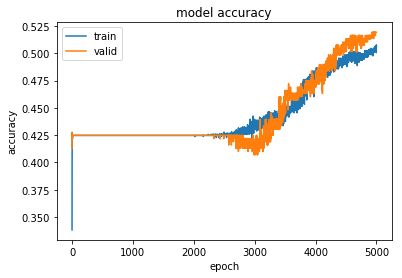

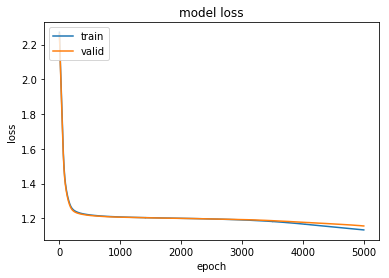

In [37]:
import matplotlib.pyplot as plt

def plot_curves(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'valid'], loc='upper left')
    plt.show()

    # summarize history for loss

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'valid'], loc='upper left')
    plt.show()
    
plot_curves(history)

In [20]:
loss_and_metrics = model.evaluate(x_valid, encode_label(y_valid), batch_size=128)
print(loss_and_metrics)

128/339 [==========>...................] - ETA: 0s[1.1713948893336068, 0.50147492379213854]


In [33]:
from sklearn.metrics import confusion_matrix

predictions = model.predict_classes(x_valid)
classes = [3, 4, 5, 6, 7, 8]

pd.DataFrame(confusion_matrix(y_valid, predictions, labels = classes), columns = classes, index = classes)

 32/339 [=>............................] - ETA: 1s

,3,4,5,6,7,8
3,0,0,3,0,0,0
4,0,0,11,2,0,0
5,0,0,96,47,1,0
6,0,0,47,85,2,0
7,0,0,4,34,3,0
8,0,0,0,4,0,0


In [34]:
%run ../main.py

Veuillez choisir le fichier d'entrainement 
First cut length:1356
Second cut length:1356


In [35]:
cleaned_data.drop(["density"], axis=1, inplace=True)
df = cleaned_data
NUM_CLASSES = 10
EPOCHS = 5000
NUM_FEATURES = df.values.shape[1]-1

df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.250714,0.137725,0.094,5
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.228571,0.209581,0.098,5
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.232857,0.191617,0.098,5
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.225714,0.149701,0.098,6
5,0.247788,0.369863,0.00,0.061644,0.105175,0.169014,0.120141,0.250714,0.137725,0.094,5
6,0.292035,0.328767,0.06,0.047945,0.095159,0.197183,0.187279,0.235714,0.077844,0.094,5
7,0.238938,0.363014,0.00,0.020548,0.088481,0.197183,0.053004,0.242143,0.083832,0.100,7
8,0.283186,0.315068,0.02,0.075342,0.101836,0.112676,0.042403,0.240000,0.143713,0.095,7
9,0.256637,0.260274,0.36,0.356164,0.098497,0.225352,0.339223,0.239286,0.281437,0.105,5
10,0.185841,0.315068,0.08,0.061644,0.141903,0.197183,0.208481,0.234286,0.125749,0.092,5
